In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_classification

import matplotlib as mpl

In [2]:
df = pd.read_csv('household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
df.shape

(2075259, 7)

In [6]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df["Global_active_power"]=df["Global_active_power"].fillna(df["Global_active_power"].mode()[0])
df["Global_reactive_power"]=df["Global_reactive_power"].fillna(df["Global_reactive_power"].mode()[0])
df["Voltage"]=df["Voltage"].fillna(df["Voltage"].mode()[0])
df["Global_intensity"]=df["Global_intensity"].fillna(df["Global_intensity"].mode()[0])
df["Sub_metering_1"]=df["Sub_metering_1"].fillna(df["Sub_metering_1"].mode()[0])
df["Sub_metering_2"]=df["Sub_metering_2"].fillna(df["Sub_metering_2"].mode()[0])
df["Sub_metering_3"]=df["Sub_metering_3"].fillna(df["Sub_metering_3"].mode()[0])


In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.080679e+00,1.221658e-01,2.408441e+02,4.582345e+00,1.107879e+00,1.282265e+00,6.377598e+00
std,1.055136e+00,1.128556e-01,3.219865e+00,4.434870e+00,6.115669e+00,5.787271e+00,8.414871e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.040000e-01,4.600000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.780000e-01,1.000000e-01,2.410500e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Text(0.5, 1.0, 'Correlation Factors Heat Map')

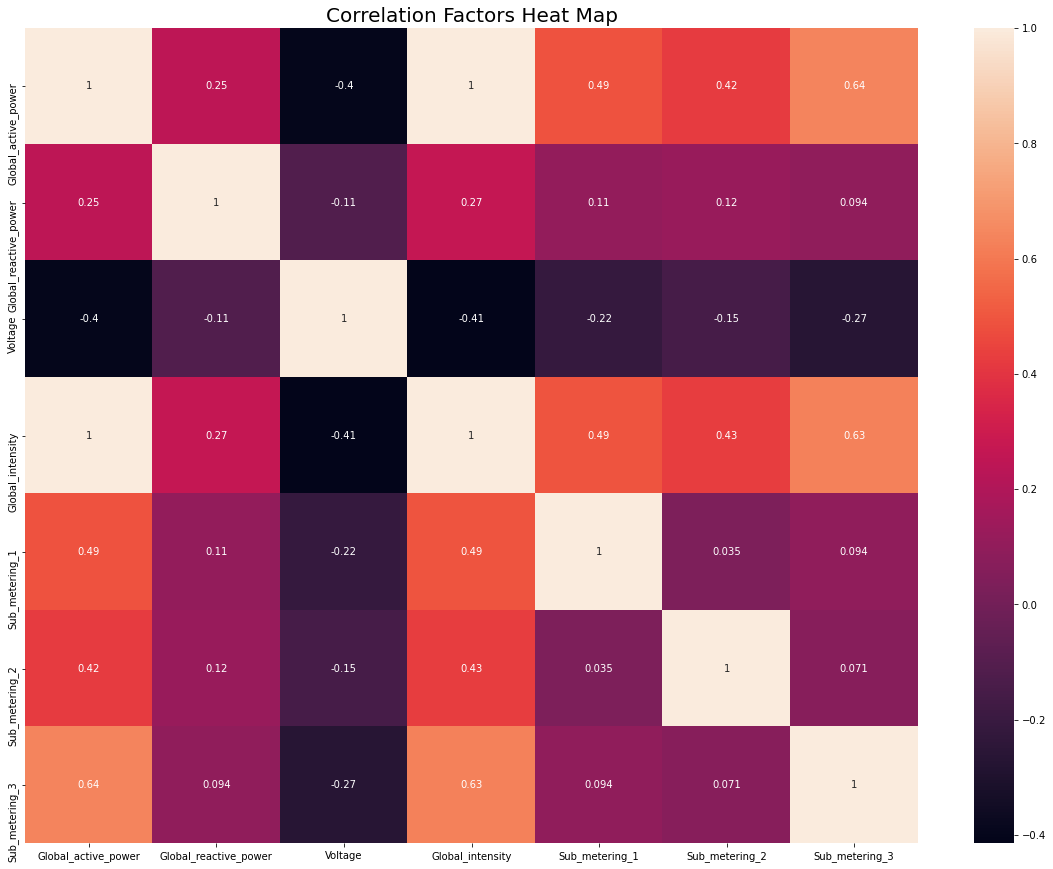

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df_sample.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [27]:
df=df.sample(n=10000)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3302 to 7573
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    10000 non-null  float64
 1   Global_reactive_power  10000 non-null  float64
 2   Voltage                10000 non-null  float64
 3   Global_intensity       10000 non-null  float64
 4   Sub_metering_1         10000 non-null  float64
 5   Sub_metering_2         10000 non-null  float64
 6   Sub_metering_3         10000 non-null  float64
 7   Clusters               10000 non-null  int32  
 8   label                  10000 non-null  int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 742.2 KB


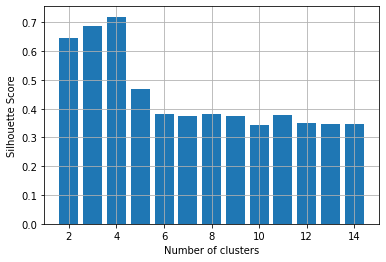

In [11]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show()

In [12]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

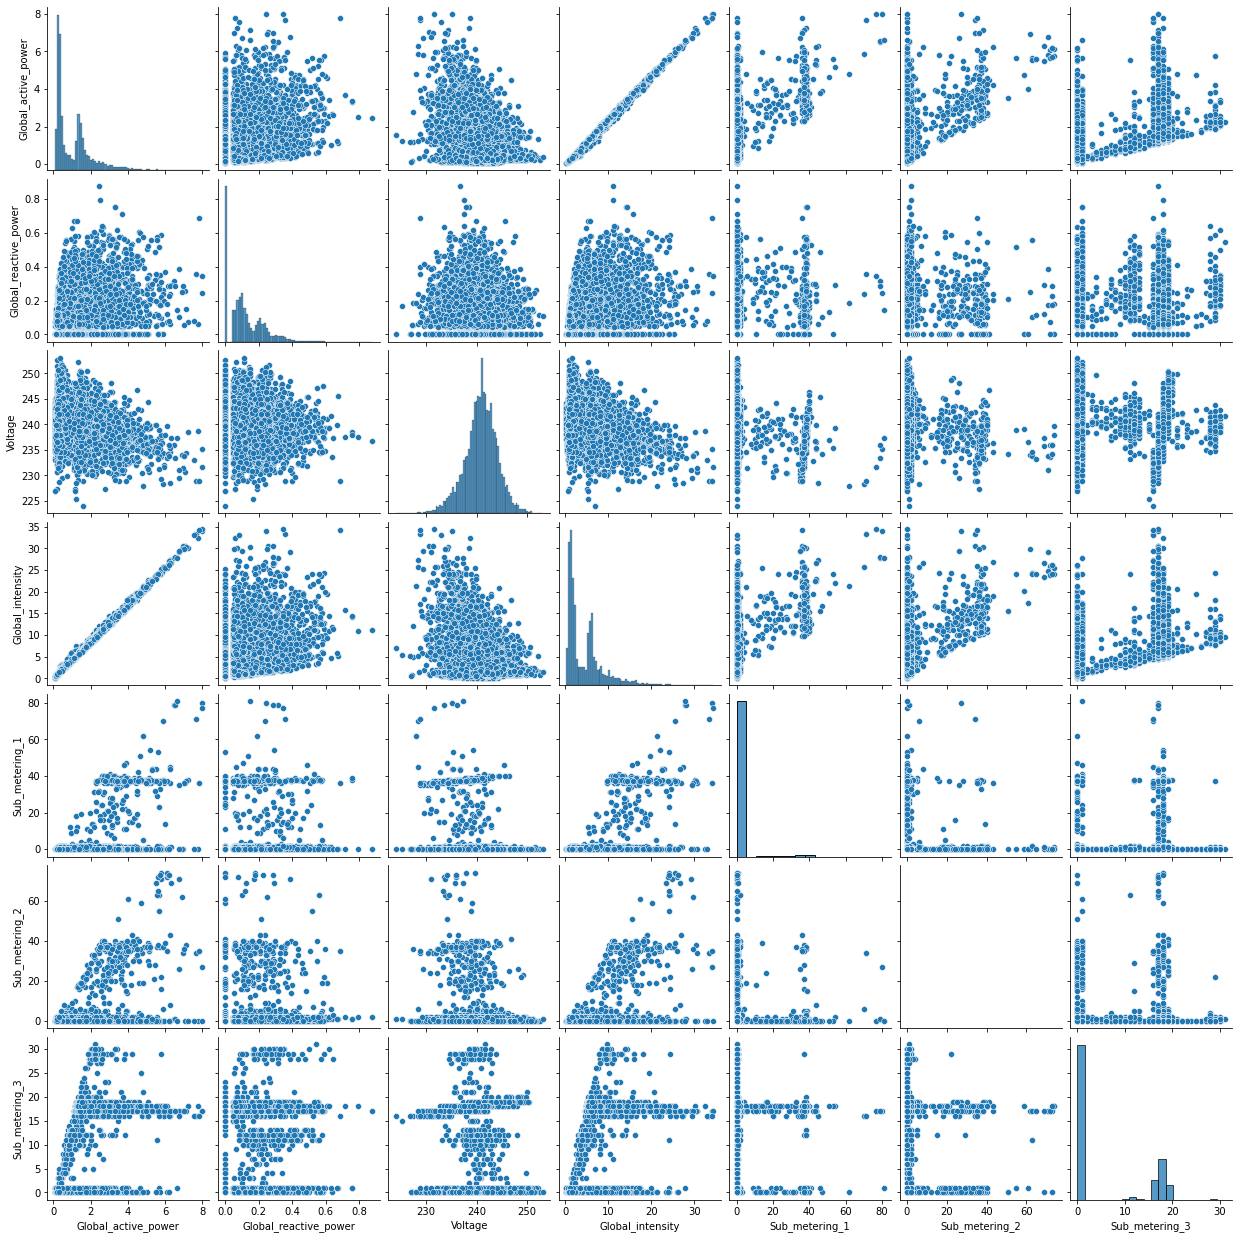

In [13]:
sns.pairplot(df)

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)

In [15]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique
from numpy import where

In [16]:
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df=df.copy()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [17]:
kmeans = KMeans(n_clusters=4)
df=df.copy()
k_fit = kmeans.fit(df)

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df['Clusters'] = predictions
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Clusters
0,0.005574,0.000000,0.561898,0.011696,0.0,0.0,0.000000,0
1,0.026349,0.159453,0.567056,0.035088,0.0,0.0,0.000000,0
2,0.269065,0.059226,0.464924,0.269006,0.0,0.0,0.000000,3
3,0.178617,0.207289,0.561554,0.175439,0.0,0.0,0.580645,1
4,0.017735,0.000000,0.591128,0.023392,0.0,0.0,0.000000,0


In [18]:
df.Clusters.value_counts()

0    4386
1    3047
3    2088
2     479
Name: Clusters, dtype: int64

In [19]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-1.044413,-0.213959,0
1,-1.032552,-0.196038,0
2,1.969442,-0.168132,3
3,-0.012131,0.363049,1
4,-1.044041,-0.209832,0


In [20]:
silhouette_scores = []

X = df.values.copy()
    
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

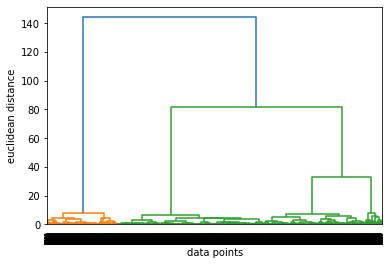

In [21]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df)
df["label"] = cluster

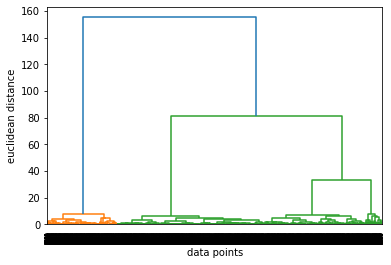

In [23]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()